<a href="https://colab.research.google.com/github/UriyaSela/my-notebooks/blob/main/Some%20practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**The Challenge**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

--------------------------------------------------------------------
#### In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## **The Data**

### Data Dictionary

| Variable   | Definition                                 | Key                                  |
|------------|---------------------------------------------|--------------------------------------|
| survival   | Survival                                    | 0 = No, 1 = Yes                      |
| pclass     | Ticket class                                | 1 = 1st, 2 = 2nd, 3 = 3rd            |
| sex        | Sex                                         |                                      |
| age        | Age in years                                |                                      |
| sibsp      | # of siblings / spouses aboard the Titanic  |                                      |
| parch      | # of parents / children aboard the Titanic  |                                      |
| ticket     | Ticket number                               |                                      |
| fare       | Passenger fare                              |                                      |
| cabin      | Cabin number                                |                                      |
| embarked   | Port of Embarkation                         | C = Cherbourg, Q = Queenstown, S = Southampton |


In [5]:
import pandas as pd

try:
  df = pd.read_csv('train.csv')
  # print(df.head())
except FileNotFoundError:
  print("Error: 'train.csv' not found. Please make sure the file exists in the current directory or provide the correct path.")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# !pip install sweetviz

In [11]:
# import sweetviz as sv

# # Generate the report
# report = sv.analyze(df)

# # Show the report
# report.show_html()


### Q1: Exploratory Data Analysis (EDA) – General Overview
Perform an initial exploratory data analysis (EDA) to understand the dataset.

Summarize key insights, including missing values, basic statistics, and distribution of categorical features.

In [18]:
import numpy as np

# Basic dataset info
print("Dataset Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

# Distribution of categorical features
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())

# Unique values per column
unique_counts = df.nunique()
print("\nUnique Values per Column:")
print(unique_counts)


# which columns should be checked with unique?

# Key Insights:
# The dataset contains missing values in Age, Cabin, and Embarked.

# Numerical features like Fare have high variance, requiring potential transformations.

# Survived is a binary target variable, and its distribution should be explored further.

# Some categorical variables like Cabin have too many unique values, which may need grouping.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.5230

### Q2

In [22]:
# Extract the first letter of the Cabin (Deck Information)
df["Cabin_Group"] = df["Cabin"].astype(str).str[0]

# Check the new grouping
df["Cabin_Group"].value_counts(dropna=False)

# Insights:

# The cabin letter represents different decks (A, B, C, etc.), which could be used for grouping.

# Many NaN values exist in Cabin, meaning some passengers might not have been assigned a cabin.

,count
Cabin_Group,
n,687
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


**Having a column with high variance in your dataset can lead to several problems** when preparing data for a machine learning model. Here's a breakdown of the key issues:

1. Domination of Features:

Scale Imbalance: Features with high variance tend to have a much wider range of values compared to features with low variance. This can lead to algorithms that are sensitive to feature scaling (like gradient descent-based algorithms, distance-based algorithms like k-NN, and support vector machines) giving disproportionate weight to the high-variance feature.
Algorithm Bias: The model might interpret the large fluctuations in the high-variance feature as being more important for prediction, even if it's not truly the case. This can overshadow the influence of other potentially more relevant features with smaller scales.
2. Instability and Difficulty in Training:

Gradient Issues: In gradient descent, large values in a feature can lead to larger gradients during training. This can cause the optimization process to oscillate, converge slowly, or even diverge, making it difficult to find the optimal model parameters.
Sensitivity to Outliers: High variance often implies a greater presence of outliers or extreme values. These outliers in a high-variance feature can have a significant and potentially negative impact on the model's learning process, pulling the decision boundaries in undesirable directions.
3. Reduced Model Performance and Generalization:

Suboptimal Learning: By focusing heavily on the high-variance feature, the model might fail to capture the underlying relationships and patterns present in the other features. This can lead to a model that performs poorly on unseen data (low generalization).
Overfitting: While high variance itself doesn't directly cause overfitting, if the high-variance feature contains noise or spurious correlations, the model might learn these noisy patterns, leading to good performance on the training data but poor performance on new data.
4. Difficulty in Interpretation:

Misleading Feature Importance: If a model assigns high importance to a high-variance feature, it might be due to its scale rather than its true predictive power. This can lead to incorrect interpretations of the factors driving the predictions.
5. Numerical Instability:

Computational Issues: In some numerical computations, very large values (often associated with high variance) can lead to overflow or underflow issues, potentially causing errors or instability in the training process.
How to Address High Variance:

Several techniques can be used to mitigate the problems caused by high-variance features:

* Feature Scaling: Techniques like standardization (scaling to have zero mean and unit variance) or normalization (scaling to a specific range, like 0 to 1) can bring all features to a similar scale, preventing high-variance features from dominating.

* Transformation: Applying transformations like logarithmic or power transformations can sometimes reduce the spread of the data and make the distribution more manageable.

* Outlier Handling: Identifying and handling outliers (e.g., removing them, capping their values, or using robust modeling techniques) can reduce the impact of extreme values that contribute to high variance.

* Feature Selection/Dimensionality Reduction: If the high-variance feature is not truly informative or is highly correlated with other features, techniques like feature selection or dimensionality reduction (e.g., Principal Component Analysis - PCA) can be used to reduce its influence or remove it altogether.

* Robust Algorithms: Some machine learning algorithms are less sensitive to feature scaling and outliers (e.g., tree-based algorithms like decision trees and random forests).

In summary, while high variance in a feature doesn't always guarantee problems, it significantly increases the risk of issues related to feature dominance, training instability, reduced model performance, and difficulty in interpretation. It's crucial to identify such features and apply appropriate preprocessing techniques to ensure a robust and effective machine learning model.

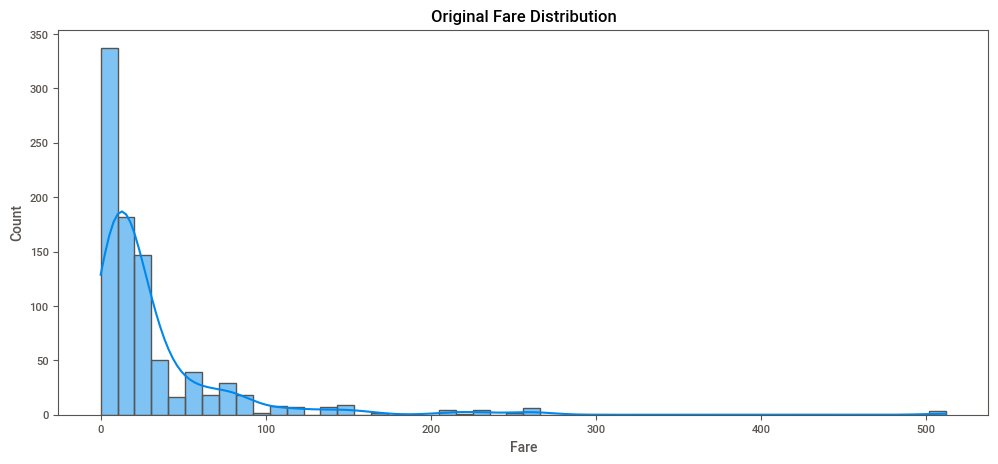

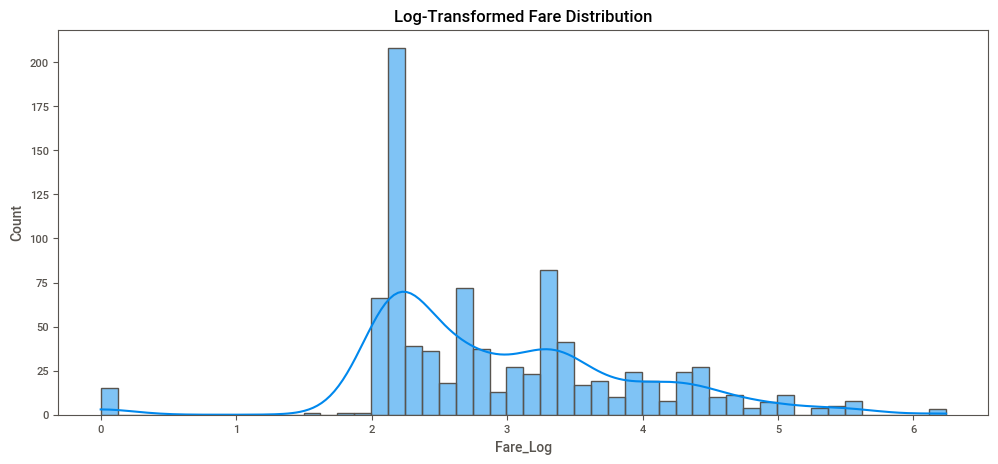

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check original Fare distribution
plt.figure(figsize=(12, 5))
sns.histplot(df["Fare"].dropna(), bins=50, kde=True)
plt.title("Original Fare Distribution")
plt.show()

# Apply log transformation
df["Fare_Log"] = np.log1p(df["Fare"])

# Check transformed distribution
plt.figure(figsize=(12, 5))
sns.histplot(df["Fare_Log"].dropna(), bins=50, kde=True)
plt.title("Log-Transformed Fare Distribution")
plt.show()


### Question 3: How does passenger survival vary by ticket class and embarkation port?
Objective:
We want to analyze how survival rates differ across ticket classes (Pclass) and embarkation ports (Embarked).

<Figure size 1000x500 with 0 Axes>

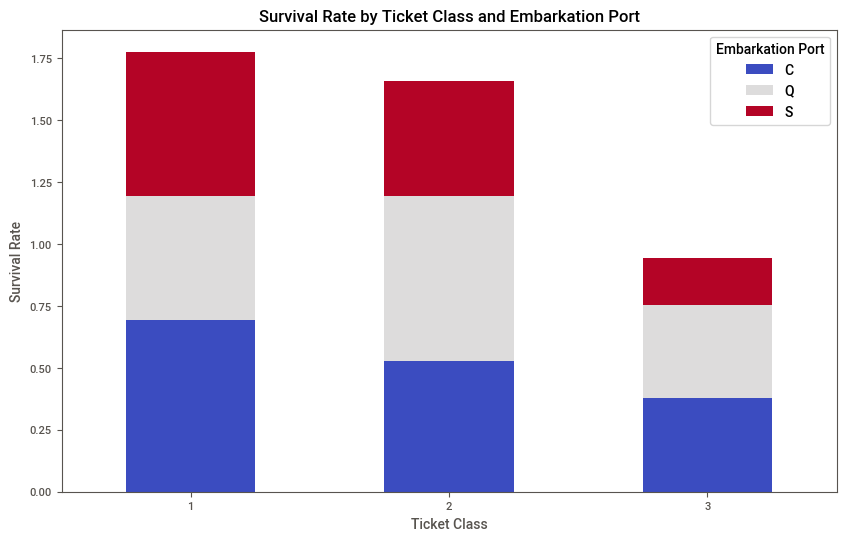

Embarked,C,Q,S
Pclass,,,
1,0.694118,0.500000,0.582677
2,0.529412,0.666667,0.463415
3,0.378788,0.375000,0.189802


In [29]:
# Calculate survival rates by ticket class and embarkation port
survival_rates = df.groupby(["Pclass", "Embarked"])["Survived"].mean().unstack()

# Plot the results
plt.figure(figsize=(10, 5))
survival_rates.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(10, 6))
plt.title("Survival Rate by Ticket Class and Embarkation Port")
plt.ylabel("Survival Rate")
plt.xlabel("Ticket Class")
plt.legend(title="Embarkation Port")
plt.xticks(rotation=0)
plt.show()

# Display the raw table
survival_rates

# Insights:
# First-class passengers have the highest survival rates, regardless of embarkation port.

# Third-class passengers have the lowest survival rates, especially those who embarked from S (Southampton).

# Passengers who embarked from 'C' (Cherbourg) tend to have better survival rates, possibly due to wealthier travelers.

### Question 4: Are there outliers in the Fare and Age columns? If so, how should they be handled?
Objective:
Detect outliers in the Fare and Age columns using statistical methods and visualization. Decide on appropriate handling strategies.

Solution:

We will:

* Use boxplots to visually inspect outliers.

* Use IQR (Interquartile Range) method to detect extreme values.

* Consider transformation or imputation strategies.

Detect Outliers Using Z-Score

A Z-score above 3 or below -3 is considered an extreme outlier.

The z-score, also known as the standard score, quantifies how many standard deviations a data point is away from the mean 1  of its dataset. A positive z-score indicates the data point is above the mean, while a negative z-score signifies it's below the mean, and a z-score of zero means it's exactly at the mean. By standardizing data, z-scores allow for comparisons across different datasets with varying means and standard deviations.

In [31]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify outliers
outliers_fare = detect_outliers(df, "Fare")
outliers_age = detect_outliers(df, "Age")

print(f"Fare outliers count: {len(outliers_fare)}")
print(f"Age outliers count: {len(outliers_age)}")


Fare outliers count: 116
Age outliers count: 11


In [68]:
from scipy.stats import zscore

def detect_outliers_zscore(df, column, threshold=3):
    df["Z_Score"] = np.abs(zscore(df[column]))
    outliers = df[df["Z_Score"] > threshold]
    return outliers

# Detecting outliers in Fare using Z-Score
outliers_fare_z = detect_outliers_zscore(df, "Fare")
print(f"Number of extreme outliers in Fare (Z-Score method): {len(outliers_fare_z)}")


Number of extreme outliers in Fare (Z-Score method): 20


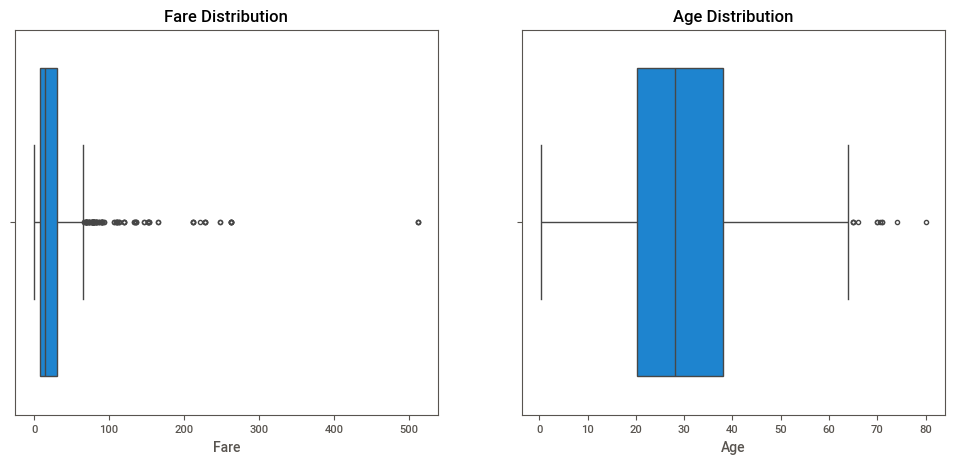

In [30]:
import seaborn as sns

# Boxplot for Fare and Age
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df["Fare"])
plt.title("Fare Distribution")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["Age"])
plt.title("Age Distribution")

plt.show()


Handling Strategies:

In [33]:
df["Fare_Log"] = np.log1p(df["Fare"])  # log1p to avoid log(0)
df["Age"].fillna(df["Age"].median(), inplace=True)

# Insights:
# The Fare column has extreme outliers, possibly from high-class passengers or errors. Log transformation helps reduce skewness.

# The Age column has some outliers, but they are not severe. Median imputation is a better choice than removal.

<ipython-input-33-6df0beddab64>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


### Question 5: What is the survival rate per passenger class and gender? Can we define survival probability metrics?
Objective:
Analyze survival rates by passenger class and gender to uncover patterns in survivability.
Define custom survival probability metrics using numpy and pandas.

Solution:

We will:

* Use groupby to compute survival rates for Pclass and Sex.

* Implement a custom function to calculate a weighted survival probability score.

Step 1: Compute Survival Rates

In [34]:
# Survival rate by Passenger Class
survival_by_class = df.groupby("Pclass")["Survived"].mean()
print(survival_by_class)

# Survival rate by Gender
survival_by_gender = df.groupby("Sex")["Survived"].mean()
print(survival_by_gender)

# Survival rate by Class and Gender
survival_pivot = df.pivot_table(values="Survived", index="Pclass", columns="Sex", aggfunc="mean")
print(survival_pivot)



Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


Step 2: Define a Custom Survival Probability Score

We will calculate a weighted probability metric based on multiple factors.

In [36]:
def survival_probability_score(df, class_weight=0.5, gender_weight=0.5):
    """
    Calculate a survival probability score based on passenger class and gender.

    Args:
        df (DataFrame): Titanic dataset
        class_weight (float): Weight for passenger class survival probability
        gender_weight (float): Weight for gender survival probability

    Returns:
        DataFrame: Updated DataFrame with a new survival probability score
    """
    survival_by_class = df.groupby("Pclass")["Survived"].mean()
    survival_by_gender = df.groupby("Sex")["Survived"].mean()

    # Mapping values back to dataset
    df["Class_Survival_Prob"] = df["Pclass"].map(survival_by_class)
    df["Gender_Survival_Prob"] = df["Sex"].map(survival_by_gender)

    # Weighted probability score
    df["Survival_Score"] = (df["Class_Survival_Prob"] * class_weight) + (df["Gender_Survival_Prob"] * gender_weight)

    return df

# Apply function
df = survival_probability_score(df)

# Display results
df[["Pclass", "Sex", "Class_Survival_Prob", "Gender_Survival_Prob", "Survival_Score"]].head(10)

# Insights:
# First-class passengers have the highest survival rate.

# Women had a significantly higher survival rate than men.

# The custom survival probability score allows for personalized risk estimation.

,Pclass,Sex,Class_Survival_Prob,Gender_Survival_Prob,Survival_Score
0,3,male,0.242363,0.188908,0.215635
1,1,female,0.629630,0.742038,0.685834
2,3,female,0.242363,0.742038,0.492200
3,1,female,0.629630,0.742038,0.685834
4,3,male,0.242363,0.188908,0.215635
5,3,male,0.242363,0.188908,0.215635
6,1,male,0.629630,0.188908,0.409269
7,3,male,0.242363,0.188908,0.215635
8,3,female,0.242363,0.742038,0.492200
9,2,female,0.472826,0.742038,0.607432


### Question 6: How do missing values impact survival analysis? Can we impute missing values effectively?
Objective:

1. Identify missing values and their proportions in the dataset.

2. Analyze if missing data correlates with survival outcomes.

3. Use numpy and pandas to fill missing values strategically.

Step 1: Identify Missing Values

In [37]:
# Check missing values
missing_counts = df.isnull().sum()
missing_percentage = (missing_counts / len(df)) * 100
missing_summary = pd.DataFrame({"Missing Count": missing_counts, "Percentage": missing_percentage})
missing_summary = missing_summary[missing_summary["Missing Count"] > 0]  # Show only missing columns

print(missing_summary)


          Missing Count  Percentage
Cabin               687   77.104377
Embarked              2    0.224467


Step 2: Handling Missing Values

We will use different imputation techniques for different features:


* Cabin: Fill with "Unknown" or extract Deck information for grouping.

* Embarked: Fill with the most frequent category.

In [61]:
# Fill Age with median per Passenger Class and Gender
# df["Age"] = df.groupby(["Pclass", "Sex"])["Age"].transform(lambda x: x.fillna(x.median()))

# Fill Embarked with the most frequent value
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Cabin Handling - Extract First Letter (Deck) or Mark as "Unknown"  ---Same as Cabin_Group---
df["Cabin"] = df["Cabin"].fillna("Unknown")
df["Deck"] = df["Cabin"].str[0]  # Extracting Deck Information

# Verify that missing values are handled
print(df.isnull().sum())


PassengerId             0
Survived                0
Pclass                  0
Name                    0
Sex                     0
Age                     0
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                   0
Embarked                0
Cabin_Group             0
Fare_Log                0
Class_Survival_Prob     0
Gender_Survival_Prob    0
Survival_Score          0
Deck                    0
dtype: int64


<ipython-input-61-b9e97a4619fa>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


### Question 7:
Create a new feature Family_Size by summing SibSp (siblings/spouses aboard) and Parch (parents/children aboard) and adding 1 (the passenger themself).

Then create another feature Is_Alone indicating whether the passenger was traveling alone.

Analyze the relationship between these features and survival rate.

   Family_Size  Survived
0            1  0.303538
1            2  0.552795
2            3  0.578431
3            4  0.724138
4            5  0.200000
5            6  0.136364
6            7  0.333333
7            8  0.000000
8           11  0.000000
   Is_Alone  Survived       Status
0         0  0.505650  With Family
1         1  0.303538        Alone


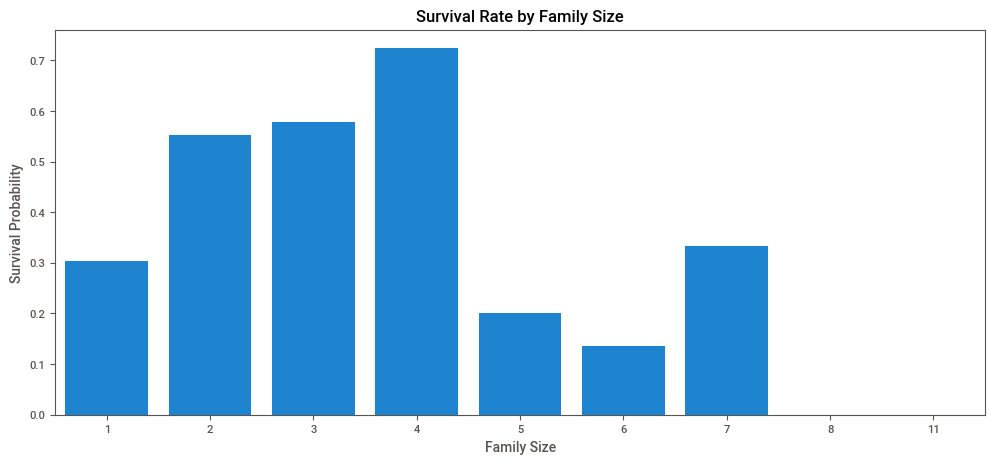

In [73]:
# Create 'Family_Size' and 'Is_Alone'
df["Family_Size"] = df["SibSp"] + df["Parch"] + 1
df["Is_Alone"] = (df["Family_Size"] == 1).astype(int)

# Analyze survival rate by Family_Size
family_survival = df.groupby("Family_Size")["Survived"].mean().reset_index()
print(family_survival)

# Analyze survival based on being alone or not
alone_survival = df.groupby("Is_Alone")["Survived"].mean().reset_index()
alone_survival["Status"] = alone_survival["Is_Alone"].map({1: "Alone", 0: "With Family"})
print(alone_survival)

# Optional: Plot it
plt.figure(figsize=(12, 5))
sns.barplot(data=family_survival, x="Family_Size", y="Survived")
plt.title("Survival Rate by Family Size")
plt.ylabel("Survival Probability")
plt.xlabel("Family Size")
plt.show()

# Family_Size captures social/family group effect on survival.

# Smaller families (2–4) had better survival odds.

# Is_Alone reveals that passengers traveling alone had lower survival rates, likely due to lack of support.


In [75]:
df["Title"] = df["Name"].str.extract(r',\s*([^.]*)\s*\.', expand=False)
df[["Name","Title"]]

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
...,...,...
886,"Montvila, Rev. Juozas",Rev
887,"Graham, Miss. Margaret Edith",Miss
888,"Johnston, Miss. Catherine Helen ""Carrie""",Miss
889,"Behr, Mr. Karl Howell",Mr


    Title  Survival_Rate  Count
0  Master       0.575000     40
1    Miss       0.697802    182
2      Mr       0.156673    517
3     Mrs       0.792000    125
4    Rare       0.444444     27


<ipython-input-76-97a33c9dc6b6>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=title_survival, x="Title", y="Survival_Rate", palette="Set2")


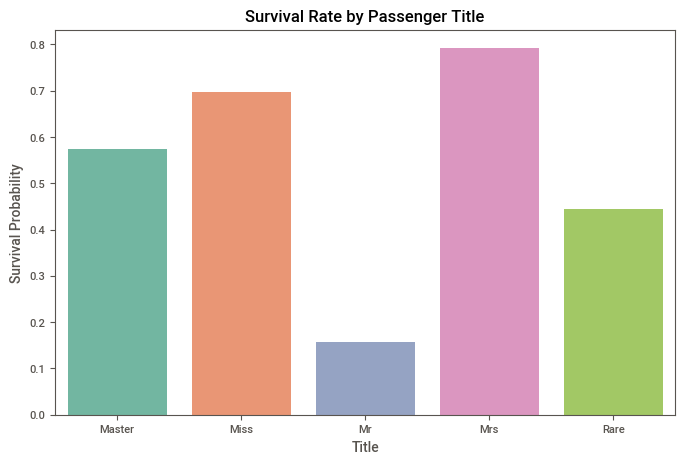

In [76]:
# Extract titles from names
df["Title"] = df["Name"].str.extract(r',\s*([^.]*)\s*\.', expand=False)

# Standardize and group rare titles
def clean_title(title):
    common_titles = ['Mr', 'Miss', 'Mrs', 'Master']
    return title if title in common_titles else 'Rare'

df["Title"] = df["Title"].apply(clean_title)

# Check survival by title
title_survival = df.groupby("Title")["Survived"].agg(["mean", "count"]).reset_index()
title_survival.rename(columns={"mean": "Survival_Rate", "count": "Count"}, inplace=True)
print(title_survival)

# Optional: Visualize
plt.figure(figsize=(8, 5))
sns.barplot(data=title_survival, x="Title", y="Survival_Rate", palette="Set2")
plt.title("Survival Rate by Passenger Title")
plt.ylabel("Survival Probability")
plt.xlabel("Title")
plt.show()


# To be continued...